Reddit Climate Change

1) Data preperation

First step is to read the data.

In [14]:
import pandas as pd

g_csv_file_posts = 'Data_Input/the-reddit-climate-change-dataset-posts.csv'

g_chunk_size = 10000
g_data_chunks_posts = []

g_first_chunk_posts = pd.read_csv(g_csv_file_posts, sep=',', nrows=1)
g_columns_posts = g_first_chunk_posts.columns

for l_chunk in pd.read_csv(g_csv_file_posts, sep=',',
                           chunksize=g_chunk_size, header=None, names=g_columns_posts):
    g_data_chunks_posts.append(l_chunk)

# Concatenate all the chunks into a single DataFrame
g_full_data_posts = pd.concat(g_data_chunks_posts, ignore_index=True)


print(g_columns_posts)

Index(['type', 'id', 'subreddit.id', 'subreddit.name', 'subreddit.nsfw',
       'created_utc', 'permalink', 'domain', 'url', 'selftext', 'title',
       'score'],
      dtype='object')


We got the column names of the posts file.

In [24]:
import pandas as pd

g_csv_file_comments = 'Data_Input/the-reddit-climate-change-dataset-comments.csv'

g_chunk_size_comments = 10000
g_data_chunks_comments = []

g_first_chunk_comments = pd.read_csv(g_csv_file_comments, sep=',', nrows=1)
g_columns_comments = g_first_chunk_comments.columns

c_counter = 0
for l_chunk in pd.read_csv(g_csv_file_comments, sep=',',
                           chunksize=g_chunk_size, header=None, names=g_columns_comments, error_bad_lines=False):
    
    g_data_chunks_comments.append(l_chunk)

# Concatenate all the chunks into a single DataFrame
g_full_data_comments = pd.concat(g_data_chunks_comments, ignore_index=True)


print(g_columns_comments)

/var/folders/y3/hkwhgtbj1z31vjtr5ty2f5ww0000gn/T/ipykernel_2772/2163757328.py:12: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  for l_chunk in pd.read_csv(g_csv_file_comments, sep=',',


ParserError: Error tokenizing data. C error: EOF inside string starting at row 127081

Same for the other file containing the comments but we encounter an error.

It could be because the file is too big but it could also be from some reading errors.
Printing the faulty lines could be helpfull  but we get an empty result. 

We should check if 127 000 lines are plausible or if there are even more lines. 

In [67]:
with open(g_csv_file_comments, 'r') as file:
    for i, line in enumerate(file):
        if i > 137079:  # Adjust the line number based on the error message
            print(f"Line {i}: {line}")
            break


Line 137080: comment,il9pfxj,3fmhe,enough_sanders_spam,false,1661133203,https://old.reddit.com/r/Enough_Sanders_Spam/comments/wtt3xm/sundays_ukraine_solidarity_roundtable_08212022/il9pfxj/,Golf courses won’t survive climate change and I don’t see people still commonly being buried a century from now. Too many people on the planet to keep tying up land with corpse storage.,-0.5719,6



The first block reads the csv file and prints the column names.
We do not need urls in our dataset therefore we drop "permalink" and "url".
This leaves us with 10 columns for the posts.

In [12]:
g_full_data_posts.drop(columns=['permalink', 'url'])

,type,id,subreddit.id,subreddit.name,subreddit.nsfw,created_utc,domain,selftext,title,score
0,type,id,subreddit.id,subreddit.name,subreddit.nsfw,created_utc,domain,selftext,title,score
1,post,x2smmw,2vh0v,democraticsocialism,false,1661990237,twitter.com,NaN,“Cities without water” is our future. The lead...,15
2,post,x2slxy,2w844,nostupidquestions,false,1661990182,self.nostupidquestions,Ok so I was having a conversation with my neig...,Sharks and climate change,2
3,post,x2slk5,6wzx9b,eduwriters,false,1661990150,eduwriters.pro,NaN,How to start a climate change essay,1
4,post,x2sbz6,46adh7,alternatitvereality,false,1661989389,i.imgur.com,NaN,Ever notice that when it’s hot a few days in J...,1
...,...,...,...,...,...,...,...,...,...,...
620904,post,aki85,2qh1n,environment,False,1262350233,seminal.firedoglake.com,NaN,Climate Change: Five Easy New Year’s Resolutions,0
620905,post,akgtp,2qk5q,climateskeptics,False,1262333495,examiner.com,NaN,2009 climate change story of the year - Climat...,4
620906,post,akgkb,2qk5q,climateskeptics,False,1262330777,ritholtz.com,NaN,Statistics: Scientific Consensus on Climate Ch...,0
620907,post,akgbz,2qk5q,climateskeptics,False,1262328753,wattsupwiththat.com,NaN,Ultimate irony: Snowstorm squelches “screaming...,9


In [20]:
g_full_data_comments.drop(columns=['permalink'])

,type,id,subreddit.id,subreddit.name,subreddit.nsfw,created_utc,body,sentiment,score
0,subreddit.id,subreddit.name,subreddit.nsfw,created_utc,permalink,domain,selftext,title,score
1,2vh0v,democraticsocialism,false,1661990237,https://old.reddit.com/r/DemocraticSocialism/c...,twitter.com,NaN,“Cities without water” is our future. The lead...,15
2,2w844,nostupidquestions,false,1661990182,https://old.reddit.com/r/NoStupidQuestions/com...,self.nostupidquestions,Ok so I was having a conversation with my neig...,Sharks and climate change,2
3,6wzx9b,eduwriters,false,1661990150,https://old.reddit.com/r/EduWriters/comments/x...,eduwriters.pro,NaN,How to start a climate change essay,1
4,46adh7,alternatitvereality,false,1661989389,https://old.reddit.com/r/AlternatitveReality/c...,i.imgur.com,NaN,Ever notice that when it’s hot a few days in J...,1
...,...,...,...,...,...,...,...,...,...
620904,2qh1n,environment,False,1262350233,https://old.reddit.com/r/environment/comments/...,seminal.firedoglake.com,NaN,Climate Change: Five Easy New Year’s Resolutions,0
620905,2qk5q,climateskeptics,False,1262333495,https://old.reddit.com/r/climateskeptics/comme...,examiner.com,NaN,2009 climate change story of the year - Climat...,4
620906,2qk5q,climateskeptics,False,1262330777,https://old.reddit.com/r/climateskeptics/comme...,ritholtz.com,NaN,Statistics: Scientific Consensus on Climate Ch...,0
620907,2qk5q,climateskeptics,False,1262328753,https://old.reddit.com/r/climateskeptics/comme...,wattsupwiththat.com,NaN,Ultimate irony: Snowstorm squelches “screaming...,9


In [51]:
import matplotlib.pyplot as plt

id_counts = g_full_data_posts['subreddit.name'].value_counts().reset_index()
id_counts.columns = ['subreddit.name', 'Count']

id_counts = id_counts.sort_values(by='Count', ascending=False)
id_counts.to_csv('Output/posts_id_counts.csv', index=False)


Save the counted subreddits in a csv file. 

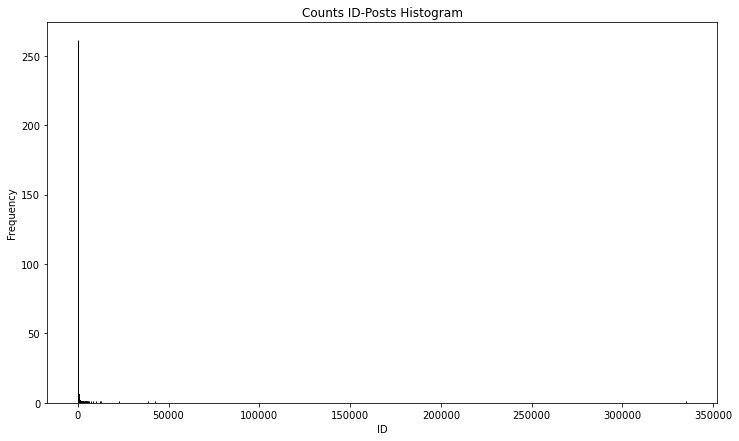

In [73]:
id_counts_filtered = id_counts[id_counts['Count'] >= 20]

# Histogram
plt.figure(figsize=(12, 7))
plt.hist(id_counts_filtered['Count'], bins=5000, color='skyblue', edgecolor='black')
plt.title('Counts ID-Posts Histogram')
plt.xlabel('ID')
plt.ylabel('Frequency')
plt.show()

In [71]:
id_counts = g_full_data_posts['score'].value_counts().reset_index()
id_counts.columns = ['score', 'Count']

id_counts['score'] = id_counts['score'].astype(int)
id_counts = id_counts.sort_values(by='score', ascending=False)
id_counts.to_csv('Output/posts_id_score.csv', index=False)

ValueError: invalid literal for int() with base 10: 'score'

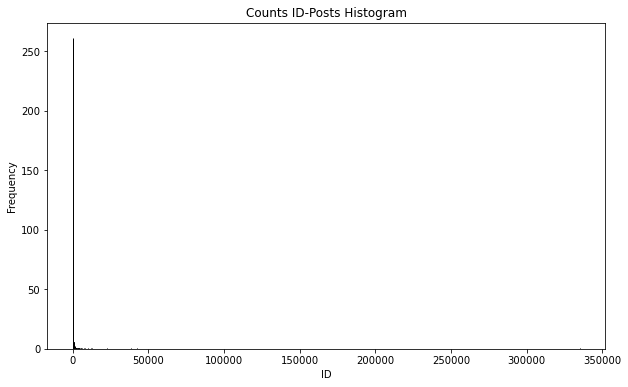

In [54]:
id_counts_filtered = id_counts[id_counts['Count'] >= 20]

# Histogram
plt.figure(figsize=(10, 6))
plt.hist(id_counts_filtered['Count'], bins=5000, color='skyblue', edgecolor='black')
plt.title('Counts ID-Posts Histogram')
plt.xlabel('ID')
plt.ylabel('Frequency')
plt.show()